<!-- ### **Python for Automation**

**Automation** means getting the computer to do repetitive or time-based tasks automatically — without needing a human to press a button every time.

**What “automation” means in Python**

Automation is any process that runs without direct human intervention once set up.

Common programming examples:

**Timers & Scheduled Tasks**
- Repeating a task on a time interval:

    - Send a batch of emails daily or weekly

    - Make API requests every few minutes to log or refresh data

**File & Data Automation**
- Automatically:

    - Clean up multiple CSV files

    - Rename or organize downloaded files

    - Combine and back up folders

**AI & Intelligent Agents**
- More advanced automation:

    - Perform multi-step workflows (e.g., fetch → summarize → post)

    - React to data changes or messages without human help

**Key takeaway**

**Automation** = Code that works for you while you’re doing something else.

Even small scripts — like fetching data every 5 minutes or merging 10 CSVs in a loop — are automation. The goal isn’t complexity, it’s efficiency. -->

In [16]:
# 0. import
# import pandas as pd
import requests
import random
import os
import csv
import time # for setting code to run on time interval
from IPython.display import Image

<!-- - When you open a file in append mode ('a'), 
- Python will automatically make the file if it doesn’t already exist.

**with open modes:**

- **'r'**	read only; does not make new file if it doesn't exist
- **'w'**	write; overwrites existing file; makes file if does not exist
- **'a'**	append (adds) to end; makes file if does not exist

Example: save a new cat fact to csv
Automation
```python
with open(file_path, "a", encoding="utf-8") as f:
        f.write(cat_fact)
``` -->

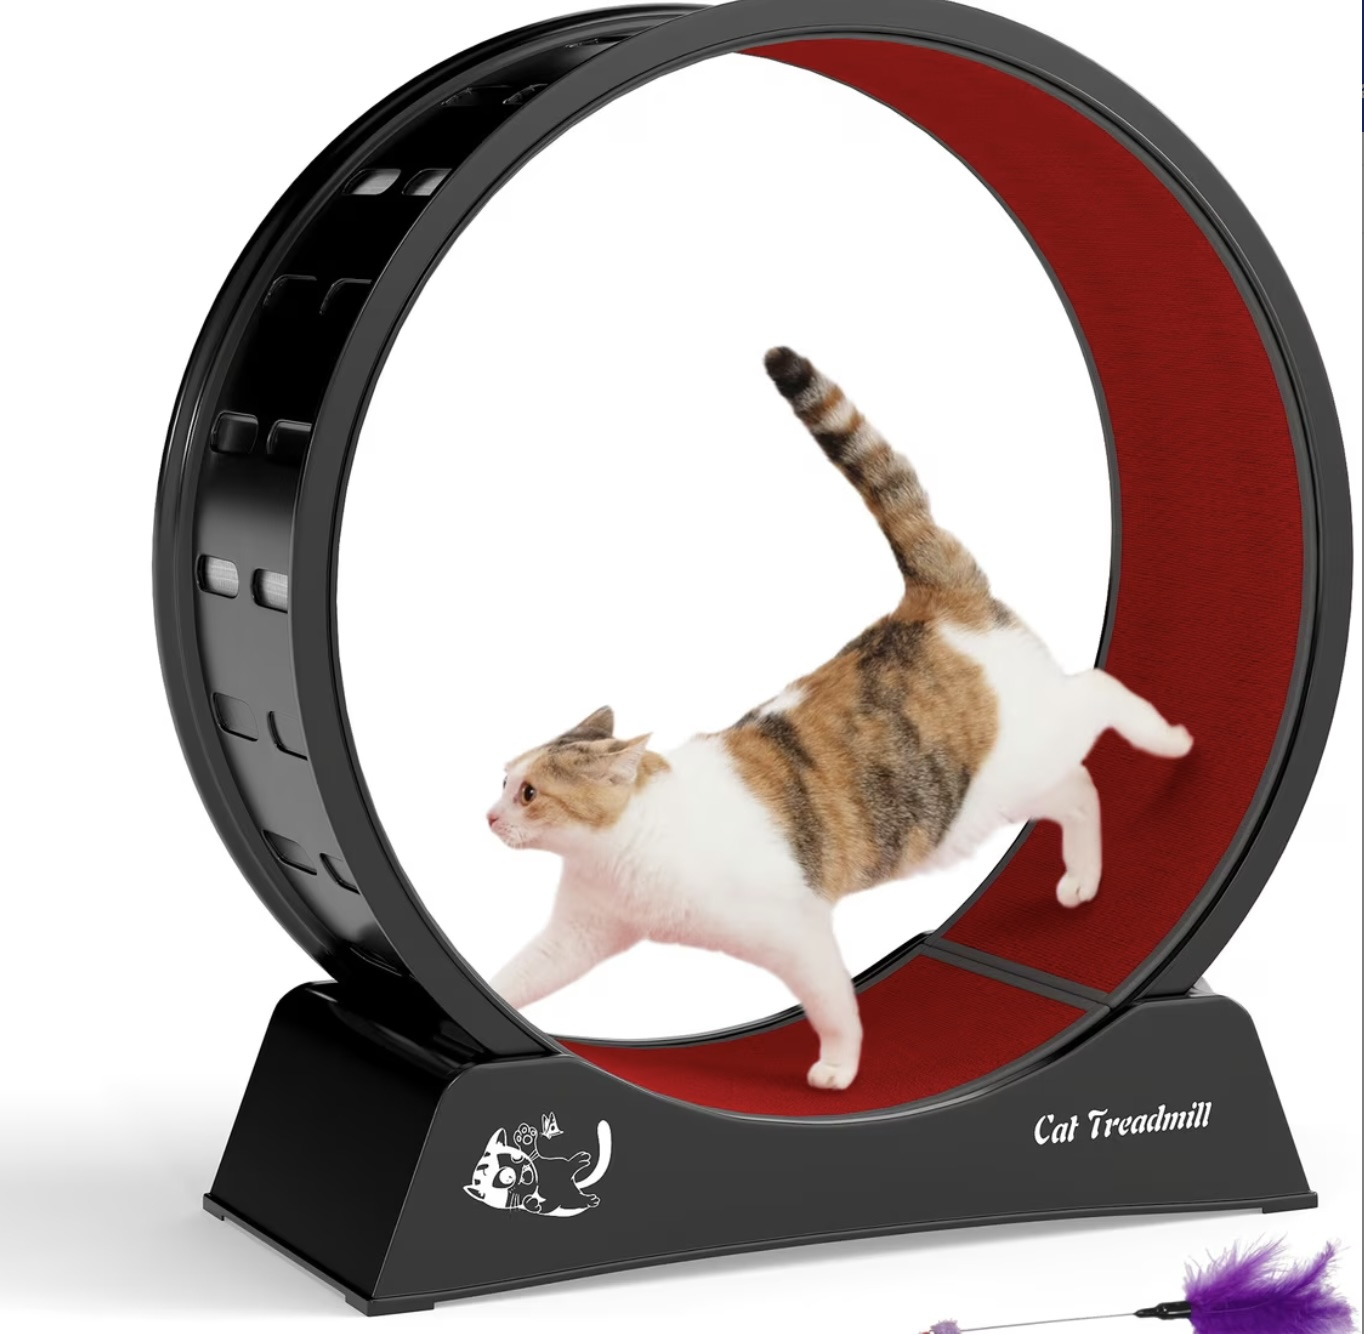

In [17]:
# # 1. output cat pic, which purr-fectly fits lesson theme:
Image('../assets/images/cat-treadmill.jpg',width=350)

<!-- **while loop vs for loop**
- **while loop** runs as long as a condition is true (total number of iterations are not known in advance)
- **for loop** runs a specified number of times, such as through a range(1,N) or through a list or other *iterable* -->

In [ ]:
# # 3. practice while loop vs for loop
# fruits = ['apple', 'banana', 'cherry', 'dragonfruit', 'elderberry', 'grapefruit', 'huckleberry', 'kiwi', 'lemon', 'mango', 'nectarine', 'orange', 'peach', 'quince', 'strawberry', 'tangerine', 'watermelon']

In [ ]:
# 4. while loop: get a random fruit until you get a 'kiwi'
# .   we don't know how many times this loop will run

In [ ]:
# 5. for loop: go through the whole list from beginning to end
# .   this loop runs an exact number of times

In [15]:
# # 6. specify a CSV file path and file name
file_path = "../csv/cat_facts_log.csv"

<!-- **run while loop to keep getting cat facts X number of times--or forever!**
- Why use a `while loop`..? Why not just have a `for loop` run 9 times?
- `for in range(9)` and `for in range(1,10)` both run 9 times
- So, yes you CAN use a `for loop` ..
- BUT `while loop` is more flexible: you can run X times or *forever*:
    - The `while True` runs the loop forever
    - many automation tasks keep going indefinitely (forever)
    - `while True` (True is always True, so loop runs forever) -->


In [ ]:
# 7. set a var for counting how many times while loop runs
cat_fact_count = 0

# 8. run while loop a specified number of times -- or forever
while cat_fact_count < 9:
    
    # 8. increment counter
    cat_fact_count = cat_fact_count + 1
    
    # 9. reqquest a cat fact
    res = requests.get("https://catfact.ninja/fact", timeout=10)
    
    # 10. parse the JSON result into a dict
    cat_fact_dict = res.json()
    
    # 11. get the cat fact string 
    cat_fact = cat_fact_dict["fact"]
    
    # 12. replace \n line breaks (if any) with spaces
    cat_fact = cat_fact.replace("\n"," ")
    
    # 13. check if file exists and save answer boolean:
    file_exists = os.path.exists(file_path)
    print("file_exists:", file_exists)

    # 14. open csv file in "append" mode so new rows get added to the end
    # the first time, csv file won't exist yet, but it will be made:
    with open(file_path, "a", encoding="utf-8") as f:
        
        # 15. instantiate a csv writer object for saving text to csv
        #.    this solves the problem of normal punctuation commas in text 
        #     being misinterpreted as column-separtors
        writer = csv.writer(f)
        
        # 16. check if csv file already exists, and if not, write a header row using the csv writer writerow method, which takes a list arg:
        if not file_exists:
            writer.writerow(["fact", "length"]) # write header row
            
        # 17. using csv writer to safely handle punctuation commas, 
        #     write / save the cat fact and its length as a new CSV row
        writer.writerow([cat_fact, len(cat_fact)])
        
    if cat_fact_count < 9:
        print(f"Saved Cat fact number {cat_fact_count}.. not done yet.")
    else:
        print(f"Saved Cat fact number 9 -- DONE!")

    
    # 14. Wait 30 seconds, then do it again
    time.sleep(30)


file_exists: False
Saved Cat fact number 1.. not done yet.
file_exists: True
Saved Cat fact number 2.. not done yet.
file_exists: True
Saved Cat fact number 3.. not done yet.
file_exists: True
Saved Cat fact number 4.. not done yet.
file_exists: True
Saved Cat fact number 5.. not done yet.
file_exists: True
Saved Cat fact number 6.. not done yet.
file_exists: True
Saved Cat fact number 7.. not done yet.
file_exists: True
Saved Cat fact number 8.. not done yet.
file_exists: True
Saved Cat fact number 9 -- DONE!


In [18]:
cat_df = pd.read_csv(file_path)

In [19]:
print(cat_df.shape)
cat_df

(9, 2)


,fact,length
0,Ancient Egyptian family members shaved their e...,91
1,The first cat show was organized in 1871 in Lo...,93
2,The largest cat breed is the Ragdoll. Male Rag...,141
3,"Cats should not be fed tuna exclusively, as it...",196
4,Tabby cats are thought to get their name from ...,100
5,Cats are now Britain's favourite pet: there ar...,96
6,"In the 1750s, Europeans introduced cats into t...",75
7,A kitten will typically weigh about 3 ounces a...,153
8,It is estimated that cats can make over 60 dif...,60


In [ ]:
### Weather API Logger Automation
# get weather from a different city from Weather API every X seconds

# 1. Given a list of cities
cities = ["New York", "Miami", "Chicago", "Los Angeles", "Boston", "Atlanta"]

# 2️. set file path for saving the log to CSV
csv_file_path = "../csv/weather_log.csv"

# 3. loop the list of cities
for city in cities:
    
    # 4. call the weather API to request weather for the current city and save the result
    url = f"https://wttr.in/{city}?format=j1"
    res = requests.get(url, timeout=10)
    
    # 5. parse the result
    data = res.json()

    # 46. parse the pieces we want
    current = data["current_condition"][0]
    temp_c = current["temp_C"]
    feels_like = current["FeelsLikeC"]
    humidity = current["humidity"]
    desc = current["weatherDesc"][0]["value"]

    # 7. write header once if file doesn’t exist
    file_exists = os.path.exists(file_path)
    with open(csv_file_path, "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        if not file_exists:
            writer.writerow(["city","temp_C","feels_like_C","humidity","desc"])
        writer.writerow([city, temp_c, feels_like, humidity, desc])

    # 8. print the result
    print(f"Saved: {city}  {temp_c}°C  Feels {feels_like}°C  ({desc})")

    # 9. wait 30 sec before repeating (so API isn’t spammed)
    time.sleep(30)


Saved: New York  16°C  Feels 16°C  (Sunny)


KeyboardInterrupt: 

<!--  -->